In [1]:
import numpy as np
import pandas as pd
from Encapsulation import *
from Linear import *
from NonLinear import *
from Loss import *
from convolution import *
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import sklearn.metrics
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def load_usps(fn):
    with open(fn,"r") as f:
        f.readline()
        data = [[float(x) for x in l.split()] for l in f if len(l.split())>2]
    tmp=np.array(data)
    return tmp[:,1:],tmp[:,0].astype(int)


X_train, y_train = load_usps("data/USPS_train.txt")
X_test, y_test = load_usps("data/USPS_test.txt")
y_train_encode = OneHotEncoder().fit_transform(y_train.reshape(-1, 1)).toarray()
y_test_encode = OneHotEncoder().fit_transform(y_test.reshape(-1, 1)).toarray()

In [3]:
print(X_train.shape)
print(y_train.shape)

(7291, 256)
(7291,)


In [4]:
def normalize(data_x):
    x_min=np.min(data_x)
    x_max=np.max(data_x)
    return (data_x-x_min)/(1.0*(x_max-x_min))

In [5]:
X_train_norm=normalize(X_train)
X_test_norm=normalize(X_test)


In [6]:
liste_coder=[Conv1D(3,1,32,1),AvgPool1D(2,2),Flatten(),Linear(4064,100),ReLU(),Linear(100,10)]

network_usps=Sequential(liste_coder)
optim_usps=Optim(network_usps,CrossEntropyLoss(),eps=0.001)
results_df=optim_usps.SGD_eval(X_train_norm[:, :, np.newaxis],y_train_encode,128,25,True)

Batch:   0%|          | 0/51 [00:01<?, ?it/s]


In [7]:
print("Le test score est : ",optim_usps.score(X_test[:, :, np.newaxis], y_test))
print("Le train score est : ",optim_usps.score(X_train[:, :, np.newaxis], y_train))

Le test score est :  0.905829596412556
Le train score est :  0.9567960499245646


In [8]:
y_hat=network_usps.forward(X_train[:, :, np.newaxis])

In [9]:
cm=sklearn.metrics.confusion_matrix(y_train,y_hat.argmax(1))

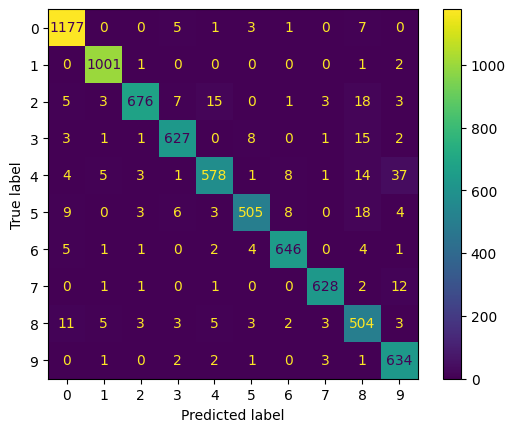

In [10]:
disp=sklearn.metrics.ConfusionMatrixDisplay(cm)
disp.plot()

<AxesSubplot: xlabel='epoch', ylabel='loss'>

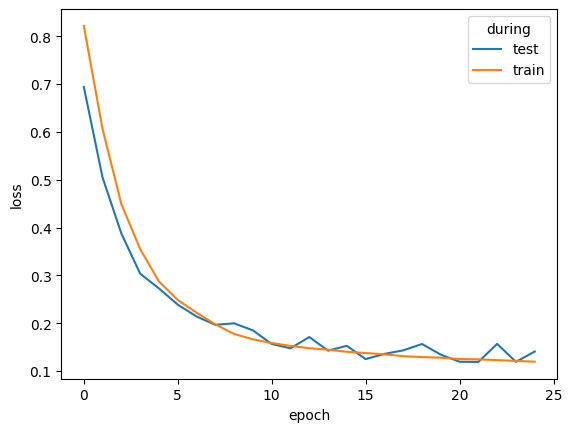

In [11]:
fig, ax = plt.subplots()
loss_long_df = pd.melt(
    results_df,
    id_vars="epoch",
    value_vars=["loss_test", "loss_train"],
    value_name="loss",
    var_name="during",
).replace({"loss_test": "test", "loss_train": "train"})
sns.lineplot(data=loss_long_df, x="epoch", y="loss", hue="during", ax=ax)

<AxesSubplot: xlabel='epoch', ylabel='score'>

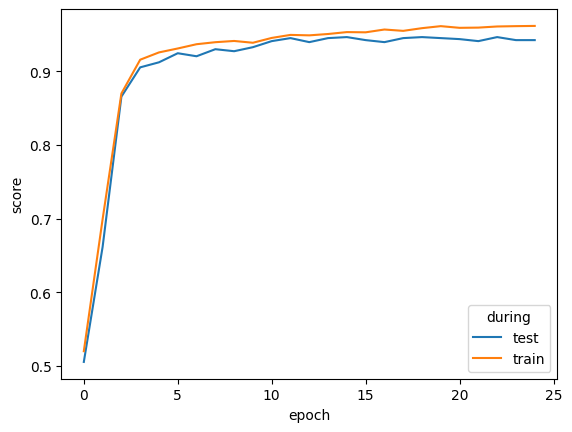

In [12]:
fig, ax = plt.subplots()
loss_long_df = pd.melt(
    results_df,
    id_vars="epoch",
    value_vars=["score_test", "score_train"],
    value_name="score",
    var_name="during",
).replace({"score_test": "test", "score_train": "train"})
sns.lineplot(data=loss_long_df, x="epoch", y="score", hue="during", ax=ax)